<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">EM Algorithm
</h2>
</div>    
</center>

<a id = 'toc'></a>
# Table of Contents

- ### [Calculus](#calculus)
- ### [Models](#models)
    - [K-Means](#kmeans)
    - [Mixture of Gaussians](#mixture)
    - [EM Algorithm](#em)
- ### [Data](#data)
- ### [Exploratory Data Analysis](#eda)
- ### [Gaussian Mixture Model](#gmm)

<a id = 'calculus'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Calculus
</h2>
</div>    
</center>

<center>
<div style="color:white;
           display:fill;
           border: 0px;
           border: 2px solid #AAA;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">EM Algorithm
</h2>
</div>    
</center>

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Main idea
</h2>
</div>    
</left>

To better understand how the algorithm makes its predictions, let's take a closer look at how it works.

The main objective of the EM algorithm is to estimate the missing data and/or the mu. The algorithm allows us to do both.

Let's say we have some data points with missing data, $Z=(X, Y)$ where only $Y$ is observed. 

We assume that there is a higher probability of observing the missing data point around the mu of the given data distribution (Gaussian), and otherwise we assume that there is a higher probability of observing the mu around given data points.

$$p(X|\mu) \sim N(\mu, 1)$$

In this case, the full data probability would be donated as $lL(\mu|(X, Y))$ - given the observed data,
$Y$ , and the current parameter estimate, $\mu_0$.

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">E-Step
</h2>
</div>    
</left>

The E-step of the EM algorithm computes the expected value of $lL(\mu|(X, Y))$:

$$\mathbb{E}(\log\mbox{L}(\mu_{1}|(X, Y))|\mu) = \int_{x} p(x | \mu_{0}) \log\mbox{L}(\mu_{1}|(X, Y)) dx$$
- $\mu_{0}$ - old mu, $\mu_{1}$ - new predicted mu

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">M-Step
</h2>
</div>    
</left>

The M-step consists of maximizing over $\mu$:

$$\mu = \arg \max_{\mu} \mathbb{E}(\log\mbox{L}|\mu)$$

[UP](#toc)

<a id = 'models'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Models
</h2>
</div>    
</center>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

import statsmodels.formula.api as smf
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal

from sklearn.cluster import KMeans

import matplotlib.style as style
#style.available
plt.style.use('seaborn-v0_8-notebook')

<a id = 'kmeans'></a>
<center>
<div style="color:white;
           display:fill;
           border: 0px;
           border: 2px solid #AAA;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">K-Means
</h2>
</div>    
</center>

- ### [K-Means (sklearn)](#kmeans_sklearn)
- ### [K-Means (from scratch)](#kmeans_scratch)

## Dataset

The dataset was imported from sklearn to generate isotropic Gaussian blobs for clustering.

<a id = 'kmeans_sklearn'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">K-Means (sklearn)
</h2>
</div>    
</left>

In [2]:
centers = np.array([[1, 1]
                , [-1, -1]])
n_clusters = len(centers)

X, true_labels = make_blobs(n_samples = 5000
                            , centers = centers
                            , cluster_std = .5)

In [3]:
# Plot the data points inside an existing figure
def plot_data(X, c=[1]*X.shape[0], mu=None, ax = None):
    if len(np.unique(c)) == 1:
        plt.plot(X[:, 0], X[:, 1], 'o')
    else:
        ix = np.where(c==1)
        ax.plot(X[ix,0], X[ix,1], 'o', 
                markerfacecolor='red')
        ax.plot(mu[0,0], mu[0,1], 'o', 
                markerfacecolor='red', 
                markersize=12)
        ix = np.where(c==0)
        ax.plot(X[ix,0], X[ix,1], 'o', 
                markerfacecolor='green')
        ax.plot(mu[1,0], mu[1,1], 'o', 
                markerfacecolor='green', 
                markersize=12)
    if mu is not None:
        plt.plot(mu[0, 0], mu[0, 1], 'o'
                , markerfacecolor = 'red', markersize = 12)
        plt.plot(mu[1, 0], mu[1, 1], 'o'
                , markerfacecolor = 'lightgreen', markersize = 12)

# Create a figure and plot the data points
def plot_figure(X, c=[1]*X.shape[0], mu=None):
    fig = plt.figure(figsize = (4,4))
    ax = fig.add_subplot(1, 1, 1)
    plot_data(X, c, mu, ax)
    plt.show()

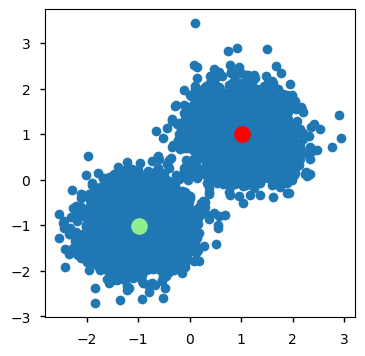

In [4]:
kmeans = KMeans(n_clusters = n_clusters, random_state = 11)
kmeans.fit(X)
mu = kmeans.cluster_centers_

# Plot centroids that K-Means has attached to each cluster 
plot_figure(X, mu = mu)

[UP](#toc)

<a id = 'kmeans_scratch'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">K-Means (from scratch)
</h2>
</div>    
</left>

In [5]:
centers = np.array([[1, 1]
                , [-1, -1]])
n_clusters = len(centers)

X, true_labels = make_blobs(n_samples = 5000
                            , centers = centers
                            , cluster_std = .5)

In [6]:
def calculate_inertia(X, mu, labels):
    a0 = np.where(labels == 0)
    a1 = np.where(labels == 1)
    
    error_cluster_0 = np.sum(np.power(X[a0, :] - mu[0, :], 2))
    error_cluster_1 = np.sum(np.power(X[a1, :] - mu[1, :], 2))
    
    return error_cluster_0 + error_cluster_1

def update_labels(X, mu):
    c = np.argmax(np.c_[np.sum(np.power(X - mu[0, :], 2), axis = 1)
                        , np.sum(np.power(X - mu[1, :], 2), axis = 1)], axis = 1)
    return c

def update_cluster_centers(X, c):
    idx_1 = np.where(c == 1)
    mu[0, :] = np.mean(X[idx_1, :], axis = 1)
    idx_0 = np.where(c == 0)
    mu[1, :] = np.mean(X[idx_0, :], axis = 1)
    return mu

In [7]:
k = 2
mu_origin = np.array([[2., -2.], [-1., 2.]])
mu = np.array([[2., -2.], [-1., 2.]])

n_iter = 10
inertia_list = []

for iteration in range(n_iter):
    c = update_labels(X, mu)
    mu = update_cluster_centers(X, c)
    inertia_list.append(calculate_inertia(X, mu, c))
    if len(inertia_list) > 1 and inertia_list[-1] == inertia_list[-2]:
        print('Early Stop: Centroides placed')
        break
    print(f'[ITER]: {iteration+1}/{n_iter}, [INERTIA]: {inertia_list[-1]}')

[ITER]: 1/10, [INERTIA]: 18386.002811584098
[ITER]: 2/10, [INERTIA]: 40942.258114888755
[ITER]: 3/10, [INERTIA]: 42146.2342594572
[ITER]: 4/10, [INERTIA]: 42149.70840679256
Early Stop: Centroides placed


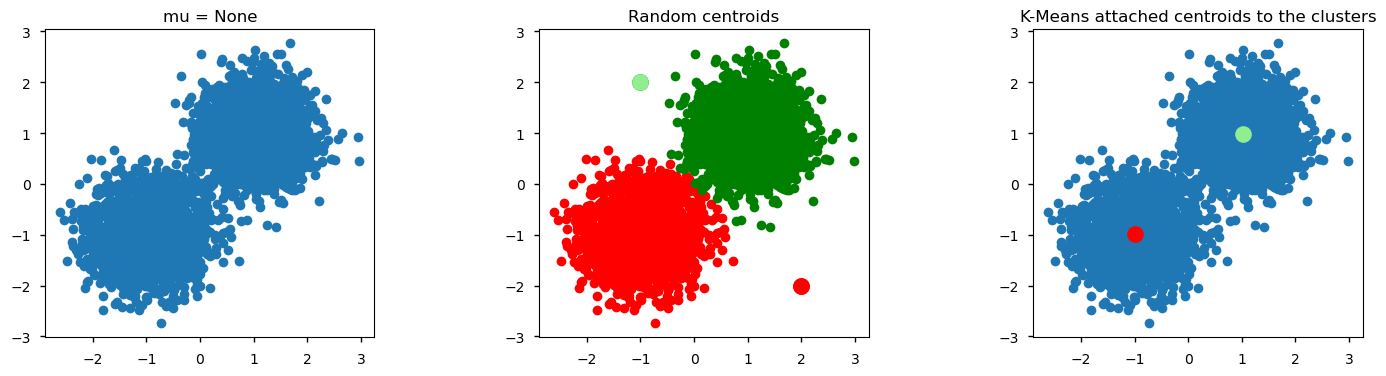

In [8]:
plt.figure(1, figsize = (17, 4))
n = 0
temp_list = []

for i in range(1, 4):
    ax = plt.subplot(1, 3, i)
    plt.subplots_adjust(hspace = .5, wspace = .5)
    if i == 1:
        plot_data(X)
        plt.title('mu = None')
    elif i == 2:
        plot_data(X, c=c, mu = mu_origin, ax = ax)
        plt.title('Random centroids')
    elif i == 3:
        plot_data(X, mu=mu)
        plt.title('K-Means attached centroids to the clusters')

[UP](#toc)

<a id = 'mixture'></a>
<center>
<div style="color:white;
           display:fill;
           border: 0px;
           border: 2px solid #AAA;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Mixture of Gaussians
</h2>
</div>    
</center>

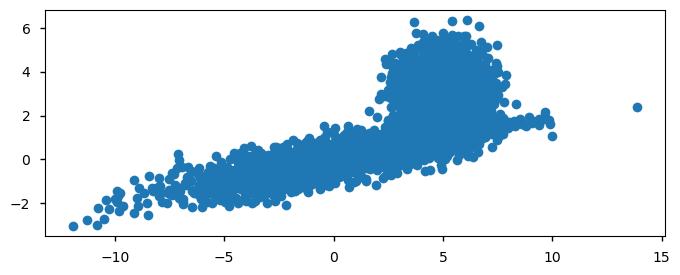

In [9]:
np.random.seed(11)
n_samples = 2000
X1 = np.random.randn(n_samples, 2) + np.array([5, 3])
C = np.array([[0., -0.5], [3.5, .7]])
X2 = np.dot(np.random.randn(n_samples, 2), C)
X_train = np.vstack([X1, X2])

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train[:, 0], X_train[:, 1], 'o')
plt.gca().set_aspect('equal', adjustable = 'box')
plt.show()

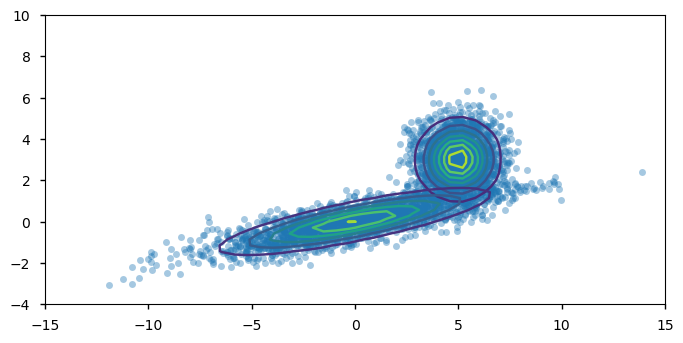

In [10]:
from sklearn.mixture import GaussianMixture

GM = GaussianMixture(n_components = 2, covariance_type = 'full')
GM.fit(X_train)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train[:,0],X_train[:,1],'o', alpha = .4, ms = 5)

for i in range(2):
    mu = GM.means_[i]
    sigma = GM.covariances_[i]
    sigma_inv = np.linalg.inv(sigma)
    sigma_det = np.linalg.det(sigma)
    
    x = np.linspace(-15.0, 15.0)
    y = np.linspace(-4.0, 10.0)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    
    XX = np.dot(np.dot(XX - mu, sigma_inv), 
                np.transpose(XX - mu))
    P = np.exp(-0.5*np.diagonal(XX))/(2*np.pi*sigma_det**0.5)
    P = P.reshape(X.shape)
    CS = plt.contour(X, Y, P)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

[UP](#toc)

<a id = 'em'></a>
<center>
<div style="color:white;
           display:fill;
           border: 0px;
           border: 2px solid #AAA;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">EM Algorithm
</h2>
</div>    
</center>

In [11]:
np.random.seed(11)
n_samples = 1500
X1 = np.random.randn(n_samples, 2) + np.array([5, 3])
C = np.array([[0., -0.5], [3.5, .7]])
X2 = np.dot(np.random.randn(n_samples, 2), C)
X_train = np.vstack([X1, X2])

In [12]:
def Estep(mu, sigma, phi):
    # calculate determinants of sigma's
    det_sigma = np.array([[np.linalg.det(sigma[i])] 
                          for i in range(k)])
    # calculate inverse matrices for sigma's
    inv_sigma = np.array([np.linalg.inv(sigma[i]) 
                          for i in range(k)]).reshape(sigma.shape)
    # calculate Q(z) = p(x|z)*p(z)/p(x)
    pxz = np.array([
            np.exp(
                -0.5*np.diagonal(
                    np.dot(
                        np.dot(X_train - mu[i,:], inv_sigma[i]), 
                        np.transpose(X_train - mu[i,:])
                    )
                )
            )/((2.0*np.pi)**(n/2.0)*det_sigma[i,0]**0.5)*phi[i,0] 
            for i in range(k)]).T
    pz = pxz/np.sum(pxz, axis=1).reshape((-1, 1))
    return pz

In [13]:
def Mstep(pz):
    pz_sum = np.sum(pz, axis=0).reshape((-1,1))
    # update parameters
    phi_new = pz_sum/m
    mu_new = np.transpose(np.dot(X_train.T, pz)/pz_sum.T)
    sigma_new = np.array([
            np.dot(np.array([
                        np.outer(X_train[j,:] - mu_new[i,:], 
                                 X_train[j,:] - mu_new[i,:]) 
                        for j in range(m)]).reshape((m, -1)).T, 
                   pz[:,i]).reshape((n,n))/pz_sum[i,0] 
            for i in range(k)]).reshape((k,n,n))
    return mu_new, sigma_new, phi_new

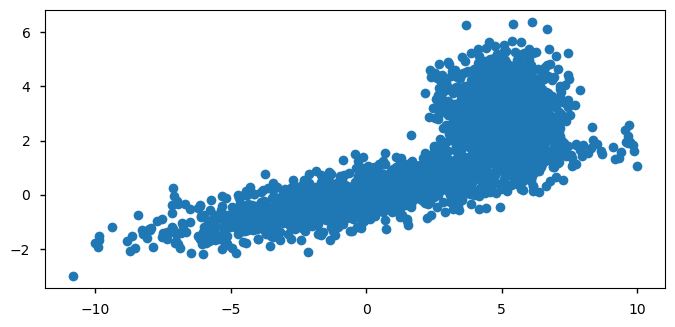

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train[:,0], X_train[:,1], 'o')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [15]:
# number of components
k = 2
# number of features
n = X_train.shape[1]
# number of training examples
m = X_train.shape[0]
# number of iterations
n_iteration = 10
# initial values of phi
phi = np.array([1.0/k]*k).reshape((k,-1))
# initial values for mu and sigma
mu = []
sigma = []
np.random.seed(234)

for cl in range(k):
    mu.append(np.mean(X_train[np.random.choice(m, int(m/2)),:], axis=0))
    sigma.append(np.identity(n))
mu = np.array(mu).reshape((k, n))
sigma = np.array(sigma).reshape((k, n, n))

[ITER]: 1/10
[ITER]: 2/10
[ITER]: 3/10
[ITER]: 4/10
[ITER]: 5/10
[ITER]: 6/10
[ITER]: 7/10
[ITER]: 8/10
[ITER]: 9/10
[ITER]: 10/10


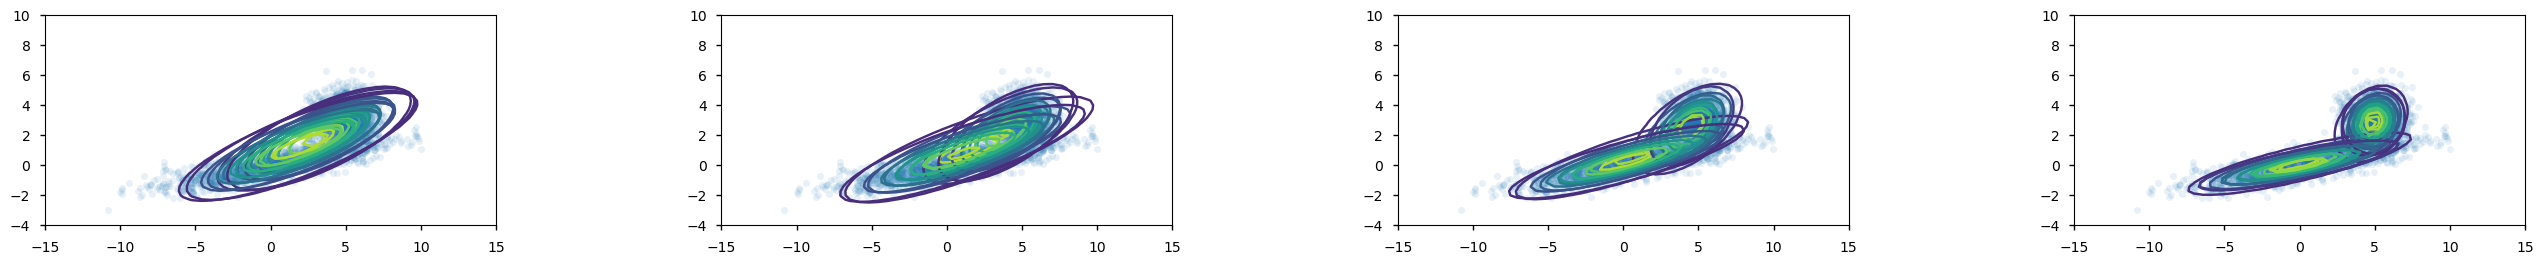

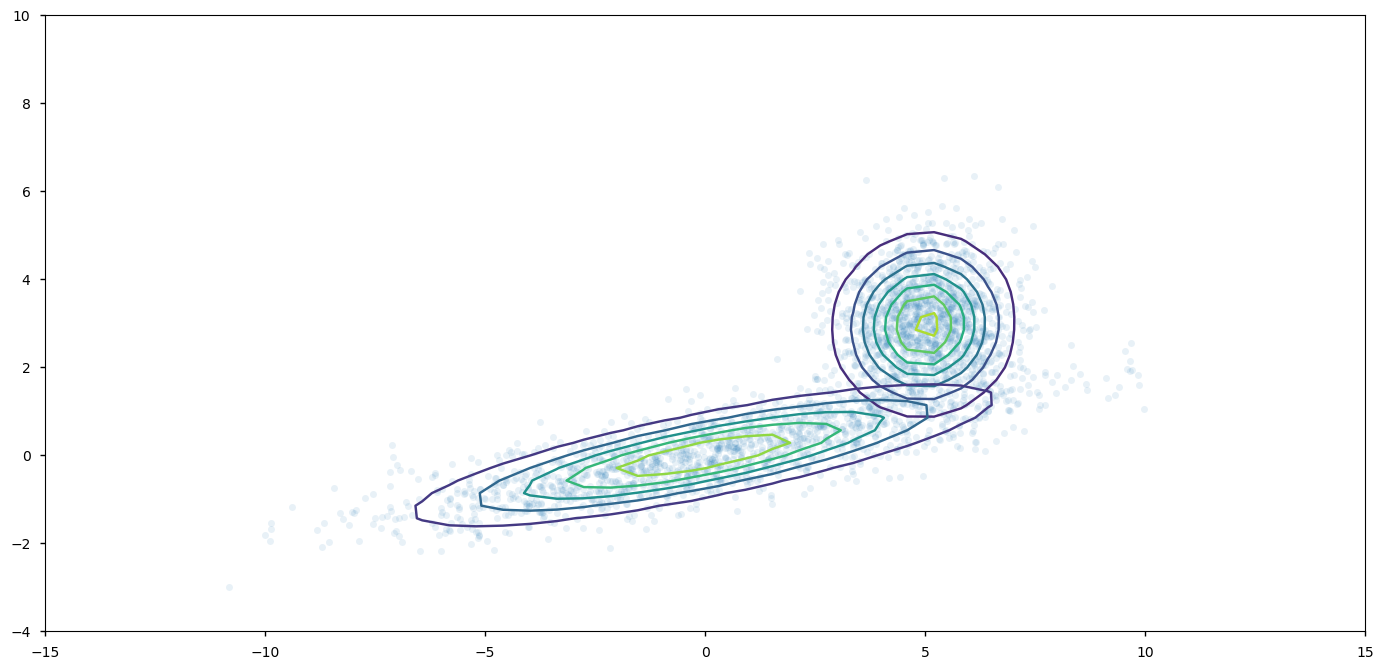

In [16]:
plt.figure(1, figsize=(32, 6))
count_iter = 0

for n_iter in range(n_iteration):
    print(f'[ITER]: {n_iter+1}/{n_iteration}')
    pz = Estep(mu, sigma, phi)
    mu, sigma, phi = Mstep(pz)
    if n_iter in (0, 2, 4, 6):
        count_iter += 1
        ax = plt.subplot(1, 4, count_iter)
        plt.subplots_adjust(hspace = .5, wspace = .5)
        ax.plot(X_train[:,0], X_train[:,1], 'o', alpha=.1, ms=5)
        plt.gca().set_aspect('equal', adjustable='box')
    if n_iter == 9:
        fig = plt.figure(figsize=(18, 8))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(X_train[:,0], X_train[:,1], 'o', alpha=.1, ms=5)
        plt.gca().set_aspect('equal', adjustable='box')
    for i in range(k):    
        mu_i = mu[i,:]
        sigma_i = sigma[i]
        sigma_i_inv = np.linalg.inv(sigma_i)
        x = np.linspace(-15.0, 15.0)
        y = np.linspace(-4.0, 10.0)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        P = np.exp(-0.5*np.diagonal(
                np.dot(
                    np.dot(XX - mu_i, sigma_i_inv), 
                    np.transpose(XX - mu_i)
                )))/(2*np.pi*np.linalg.det(sigma_i)**0.5)
        P = P.reshape(X.shape)
        CS = plt.contour(X, Y, P)

[UP](#toc)

<a id = 'data'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Data
</h2>
</div>    
</center>

## Dataset

Parsed data from customers' supermarket membership cards.

## Features
- **ID**
- **age**
- **gender**
- **annual income** - customers yearly income
- **spending score** - assign to the customer based on customer behavior and purchasing data

In [17]:
df = pd.read_csv('Mall_Customers.csv')
df.columns = df.columns.str.lower()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerid              200 non-null    int64 
 1   gender                  200 non-null    object
 2   age                     200 non-null    int64 
 3   annual income (k$)      200 non-null    int64 
 4   spending score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
df.describe()

,customerid,age,annual income (k$),spending score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


[UP](#toc)

<a id = 'eda'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Exploratory Data Analysis
</h2>
</div>    
</center>

- [Target wise gender and age](#eda_target)
- [Distribution](#eda_distribution)
- [Relation between features](#eda_relation)

In [20]:
def range_step(start, end, step, num):
    temp_ = np.array(range(start, end+step, step))
    if float(num) > end:
        return 'x > ' + str(end)
    elif float(num) <= start:
        return 'x <= ' + str(start)
    else:
        return str(temp_[num > temp_][-1]) + ' < x <= ' + str(temp_[num <= temp_][0])

<a id = 'eda_target'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Target wise gender and age
</h2>
</div>    
</left>

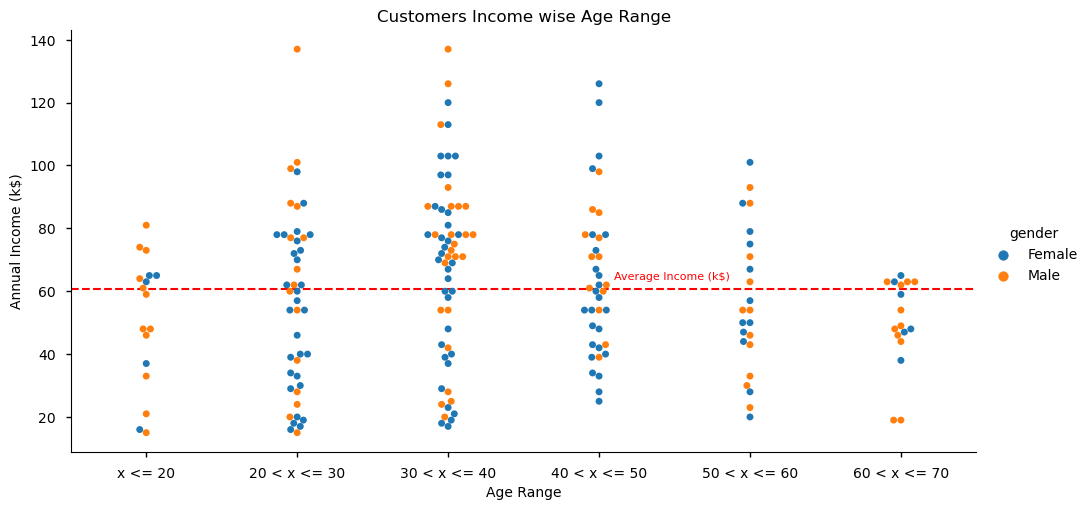

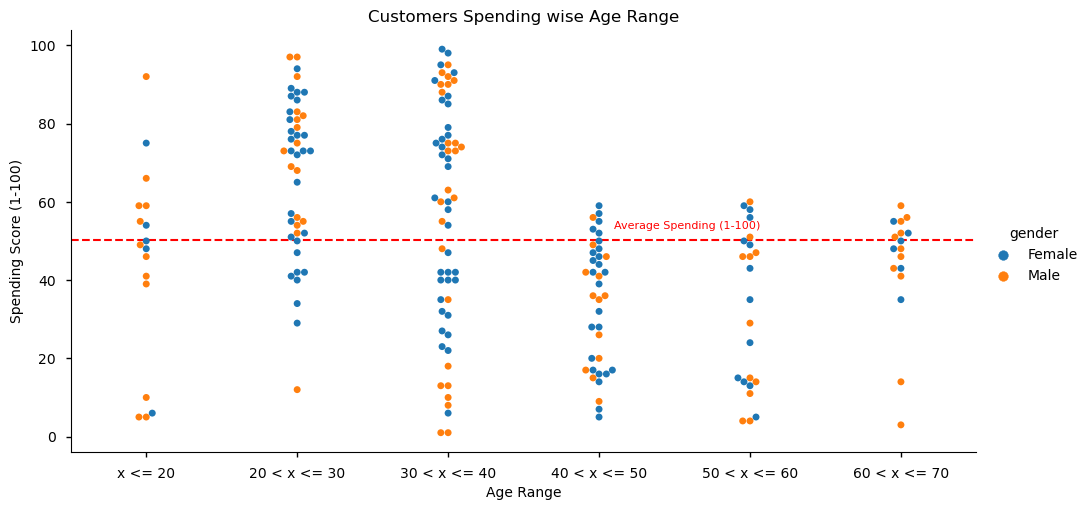

In [21]:
df['age_range'] = df['age'].apply(lambda x: range_step(20, 70, 10, x))

sns.catplot(data = df.sort_values('age'), x = 'age_range', y = 'annual income (k$)'
            , hue = 'gender', kind = 'swarm', aspect = 2, height = 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(df['annual income (k$)'].mean(), linestyle = '--', lw = 1.5, color = 'red')
plt.annotate(f'Average Income (k$)', (3.1, df['annual income (k$)'].mean()+3)
            , fontsize = 8, color = 'red')
plt.title('Customers Income wise Age Range')
plt.xlabel('Age Range')
plt.ylabel('Annual Income (k$)')


sns.catplot(data = df.sort_values('age'), x = 'age_range', y = 'spending score (1-100)'
            , hue = 'gender', kind = 'swarm', aspect = 2, height = 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(df['spending score (1-100)'].mean(), linestyle = '--', lw = 1.5, color = 'red')
plt.annotate(f'Average Spending (1-100)', (3.1, df['spending score (1-100)'].mean()+3)
            , fontsize = 8, color = 'red')
plt.title('Customers Spending wise Age Range')
plt.xlabel('Age Range')
plt.ylabel('Spending Score (1-100)')
plt.show()

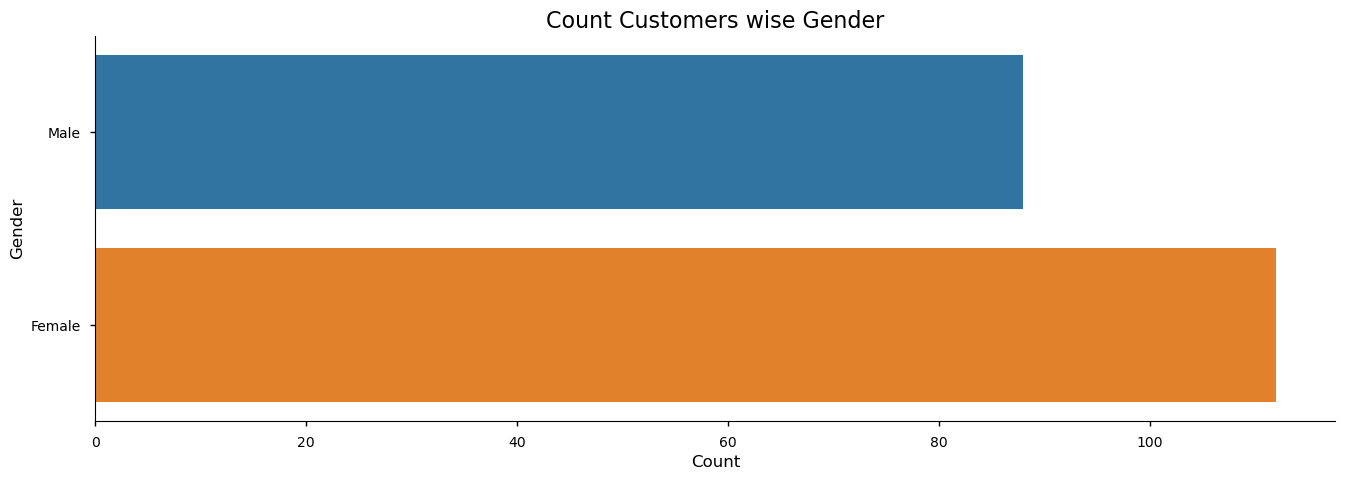

In [22]:
plt.figure(1, figsize = (16, 5))
sns.countplot(data = df, y = 'gender')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Count Customers wise Gender', fontsize = 16)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Gender', fontsize = 12)
plt.show()

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  The range of annual incomes appears balanced enough to avoid problems caused by unbalanced gender data. While there seems to be more interest in the spending score among the younger generation, it appears to be higher than expected.
</div>

<a id = 'eda_distribution'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Distribution
</h2>
</div>    
</left>

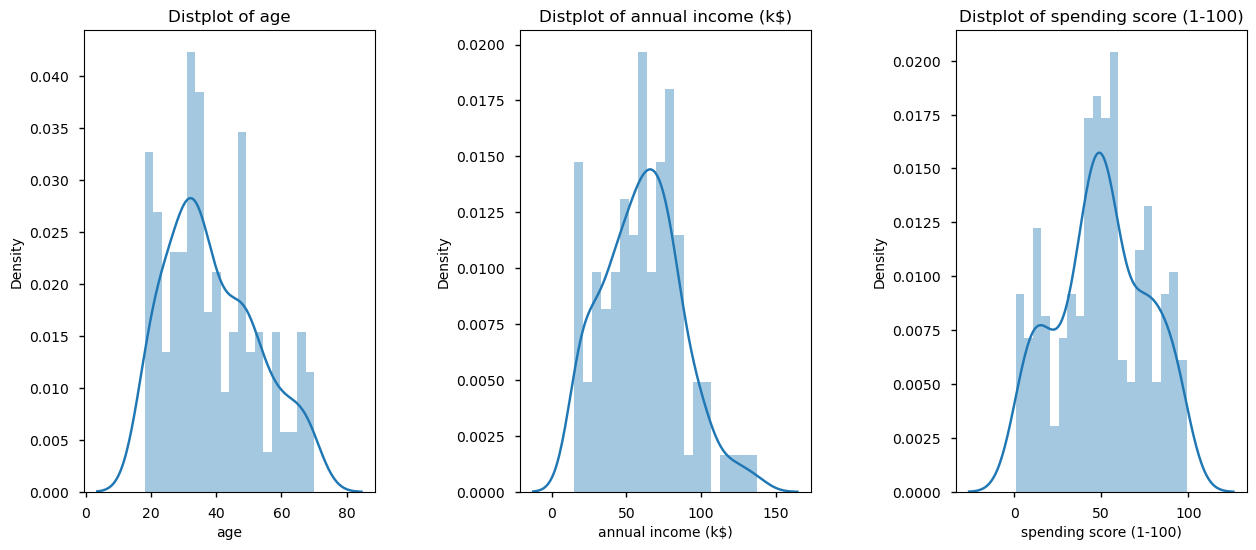

In [23]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['age', 'annual income (k$)', 'spending score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  Now we can clearly see that the age group between 20 and 40 is higher, that's our target group (more customers, better spending score, a higher income).
</div>

<a id = 'eda_relation'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Relation between features
</h2>
</div>    
</left>

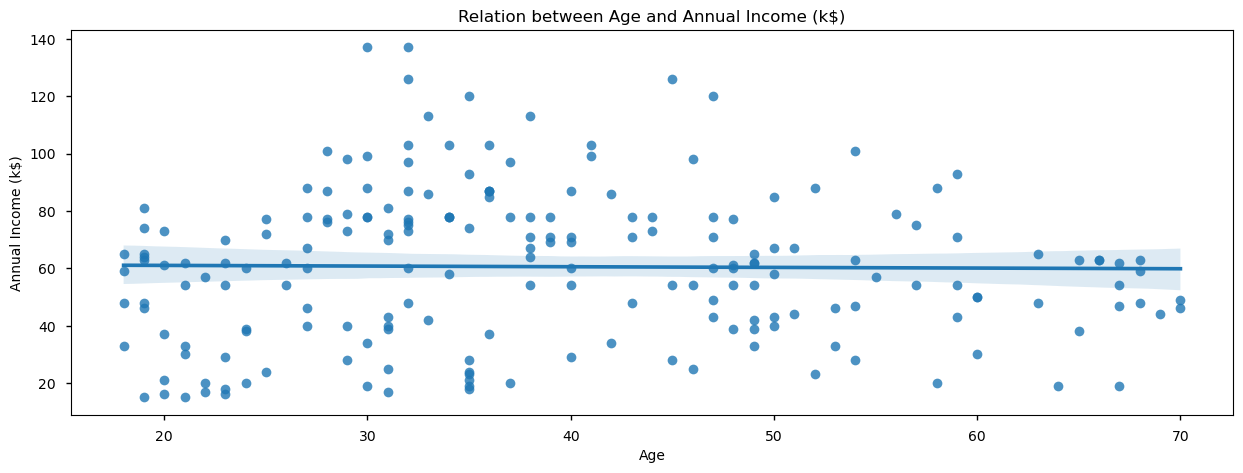

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.03044
Date:                Sat, 17 Feb 2024   Prob (F-statistic):              0.862
Time:                        23:09:45   Log-Likelihood:                -810.64
No. Observations:                 200   AIC:                             1625.
Df Residuals:                     198   BIC:                             1632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        39.2493      2.494     15.739

In [24]:
plt.subplots(figsize = (15, 5))
sns.regplot(data = df, x = 'age', y = 'annual income (k$)')
plt.title('Relation between Age and Annual Income (k$)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

df['annual_income'] = df['annual income (k$)']

m1 = smf.ols('age ~ annual_income', data = df)
fitted = m1.fit()
print(fitted.summary())

df.drop(columns = 'annual_income', axis = 1, inplace = True)

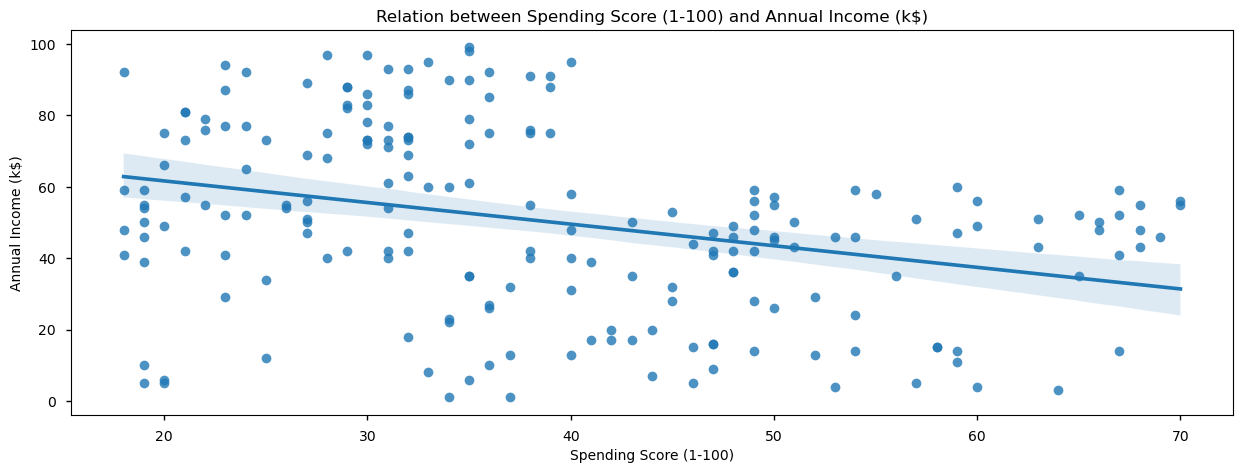

                            OLS Regression Results                            
Dep. Variable:         spending_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01942
Date:                Sat, 17 Feb 2024   Prob (F-statistic):              0.889
Time:                        23:09:45   Log-Likelihood:                -933.53
No. Observations:                 200   AIC:                             1871.
Df Residuals:                     198   BIC:                             1878.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        49.6104      4.610     10.761

In [25]:
plt.subplots(figsize = (15, 5))
sns.regplot(data = df, x = 'age', y = 'spending score (1-100)')
plt.title('Relation between Spending Score (1-100) and Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

df['spending_score'] = df['spending score (1-100)']
df['annual_income'] = df['annual income (k$)']

m1 = smf.ols('spending_score ~ annual_income', data = df)
fitted = m1.fit()
print(fitted.summary())

df.drop(columns = ['spending_score', 'annual_income'], axis = 1, inplace = True)

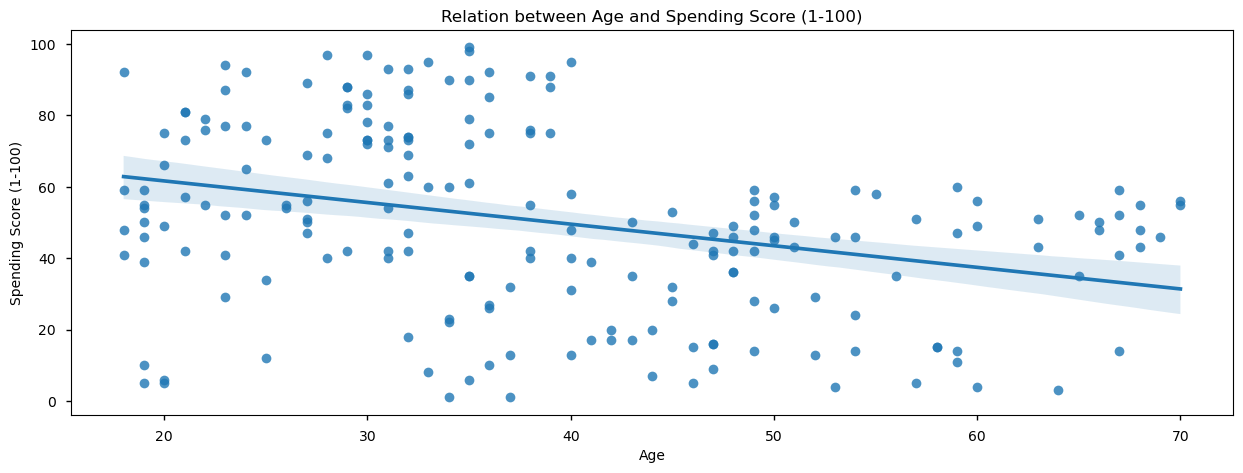

                            OLS Regression Results                            
Dep. Variable:         spending_score   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     23.74
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           2.25e-06
Time:                        23:09:45   Log-Likelihood:                -922.22
No. Observations:                 200   AIC:                             1848.
Df Residuals:                     198   BIC:                             1855.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.7012      5.124     14.384      0.0

In [26]:
plt.subplots(figsize = (15, 5))
sns.regplot(data = df, x = 'age', y = 'spending score (1-100)')
plt.title('Relation between Age and Spending Score (1-100)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

df['spending_score'] = df['spending score (1-100)']

m1 = smf.ols('spending_score ~ age', data = df)
fitted = m1.fit()
print(fitted.summary())

df.drop(columns = 'spending_score', axis = 1, inplace = True)

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>

**Variability at each point:** 60%. - This means that the expenditure score decreases as the availability of age increases.

**The coefficient of determination** tells us about the reliability of the "influence" of the independent variable (age) on the dependent variable (spending score).

**The T-criterion (its p-value)** indicates the statistical significance of the variable. It is also a test of the null hypothesis of equality b1 (slope) = 0. Since the probability is lower than our critical level of significance (alpha = 0.05), we reject the null hypothesis in favour of the alternative hypothesis.

**F-value** - obtained by applying the analysis of variance to test the global test that our model allows us to explain the behaviour of the dependent variable.
</div>

[UP](#toc)

<a id = 'gmm'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Gaussian Mixture Model
</h2>
</div>    
</center>

- [Segmentation: Age and Spending Score](#gmm_log)

<a id = 'kmeans_age_spending'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Segmentation: Spending Score ($\log$) and Annual Income ($\log$)
</h2>
</div>    
</left>

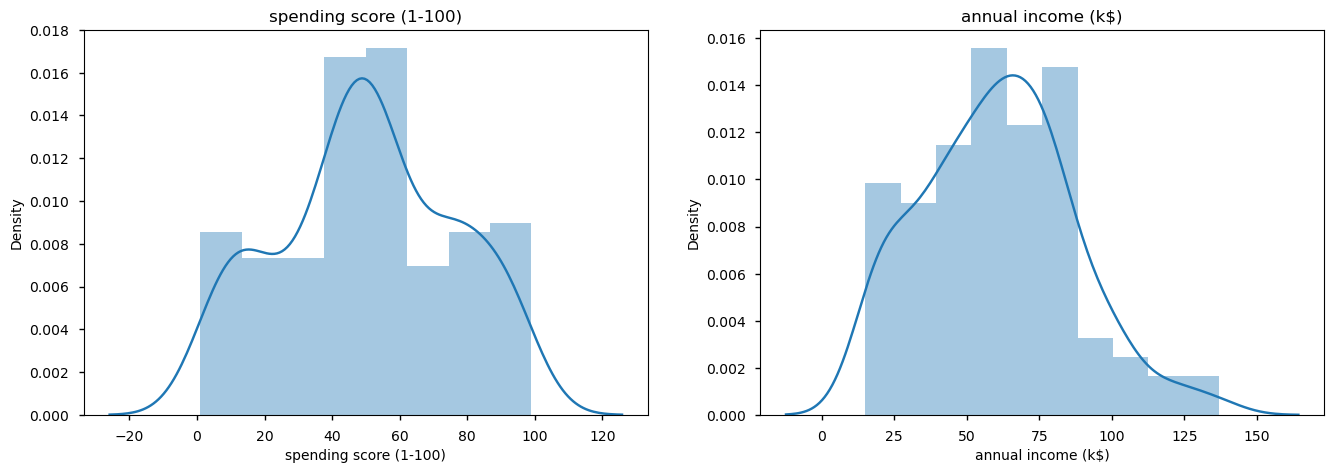

In [27]:
fig = plt.figure(figsize = (16, 5))

cols_list = ['spending score (1-100)', 'annual income (k$)']

for i in range(0, 2):
    ax = fig.add_subplot(1, 2, i+1)
    sns.distplot(df[cols_list[i]])
    plt.title(cols_list[i])

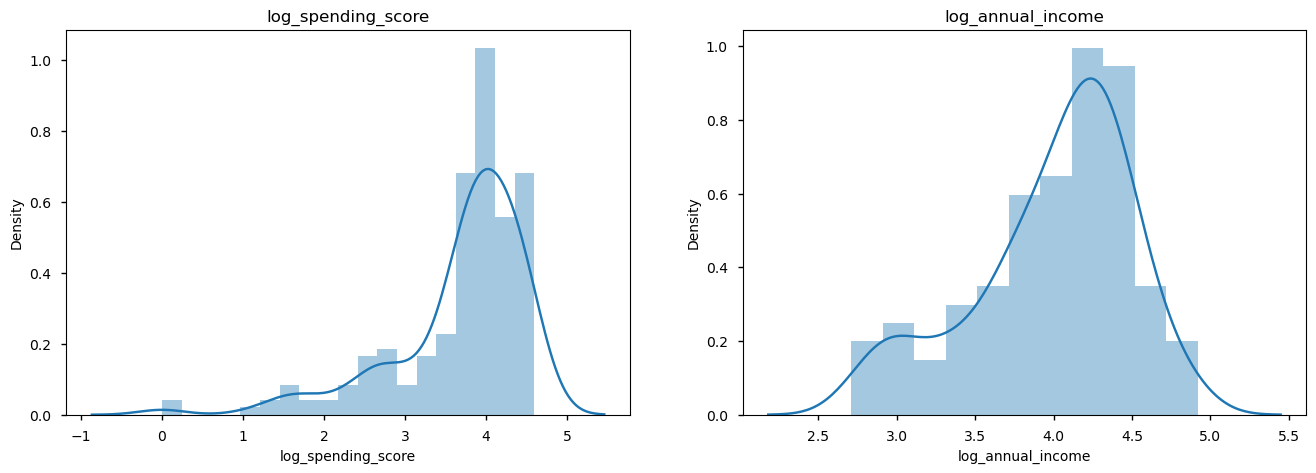

In [28]:
df['log_spending_score'] = np.log(df['spending score (1-100)'])
df['log_annual_income'] = np.log(df['annual income (k$)'])

fig = plt.figure(figsize = (16, 5))

cols_list = ['log_spending_score', 'log_annual_income']

for i in range(0, 2):
    ax = fig.add_subplot(1, 2, i+1)
    sns.distplot(df[cols_list[i]])
    plt.title(cols_list[i])

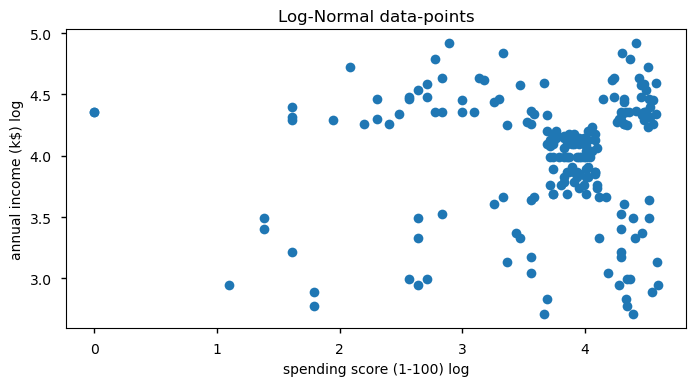

In [29]:
#X_train = df[['spending score (1-100)', 'annual income (k$)']].values
X_train = df[['log_spending_score', 'log_annual_income']].values


fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train[:, 0], X_train[:, 1], 'o')
plt.title('Log-Normal data-points')
plt.xlabel('spending score (1-100) log')
plt.ylabel('annual income (k$) log')

plt.gca().set_aspect('equal', adjustable = 'box')
plt.show()

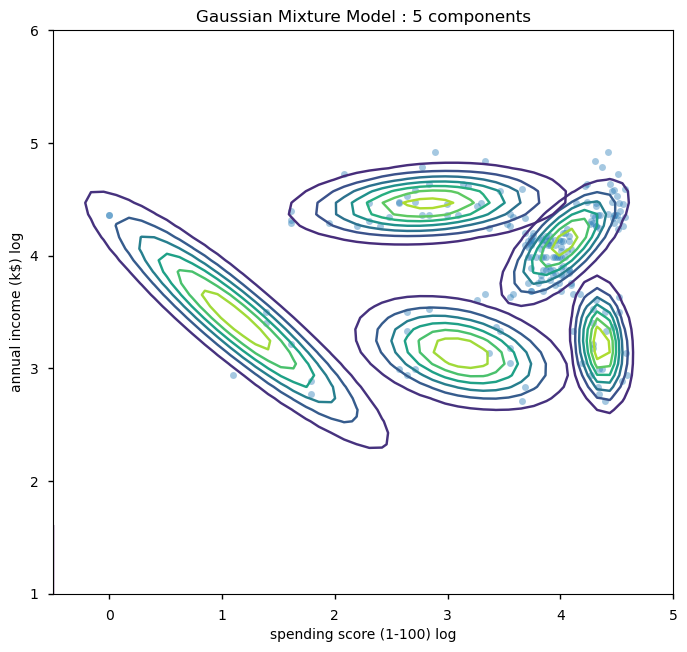

In [30]:
from sklearn.mixture import GaussianMixture

GM = GaussianMixture(n_components = 5
                     , covariance_type = 'full'
                     , random_state = 3)
GM.fit(X_train)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train[:,0],X_train[:,1],'o', alpha = .4, ms = 5)

for i in range(5):
    mu = GM.means_[i]
    sigma = GM.covariances_[i]
    sigma_inv = np.linalg.inv(sigma)
    sigma_det = np.linalg.det(sigma)
    
    x = np.linspace(-0.5, 5.0)
    y = np.linspace(1, 6.0)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    
    XX = np.dot(np.dot(XX - mu, sigma_inv), 
                np.transpose(XX - mu))
    P = np.exp(-0.5*np.diagonal(XX))/(2*np.pi*sigma_det**0.5)
    P = P.reshape(X.shape)
    CS = plt.contour(X, Y, P)
    
plt.title('Gaussian Mixture Model : 5 components')
plt.xlabel('spending score (1-100) log')
plt.ylabel('annual income (k$) log')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

[UP](#toc)